In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import math

## Загружаем сырые данные

In [89]:
raw_data = pd.read_csv('dset.csv', sep = ';')
raw_data

,Invoice,Quantity
0,489434,12
1,489434,12
2,489434,12
3,489434,48
4,489434,24
...,...,...
944463,575312,6
944464,575312,4
944465,575312,6
944466,575312,12


## Группируем данные по номерам чеков, суммируя количество товаров в каждой позиции

In [90]:
group_data = raw_data.groupby(["Invoice"]).sum()
df = group_data.loc[group_data['Quantity'] > 0]  #Исключаем строки с отрицательным количеством товаров (возвраты)
df = df.sort_values(by=['Quantity'])  #Сортируем для удобства
df

,Quantity
Invoice,
C496350,1
556934,1
556947,1
556948,1
556949,1
...,...
501534,63974
541431,74215
497946,83774


## Строим гистограмму, а также приблизительный график распределения

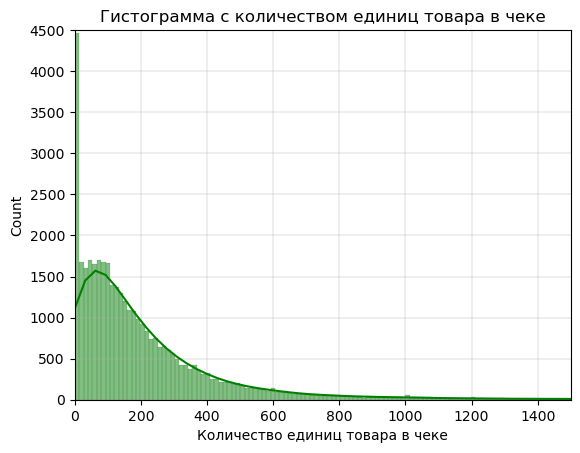

In [91]:
hist = sns.histplot(df['Quantity'][:38900], color = 'green', kde = True)
plt.title("Гистограмма с количеством единиц товара в чеке")
plt.xlabel("Количество единиц товара в чеке")
plt.grid(linewidth=0.3)  # Добавляем сетку
plt.xlim(0, 1500)
plt.ylim(0, 4500)
plt.show()

## Строим статистическое распределение вероятности на основе полученных данных, 
## а также максимально близкое к нему теоретическое распределение (chi2)

In [92]:
def f(l,x):
    return l*np.exp(-l*x)

def F(l,x):
    return 1-np.exp(-l*x)

In [93]:
l = 1/quantities.mean()

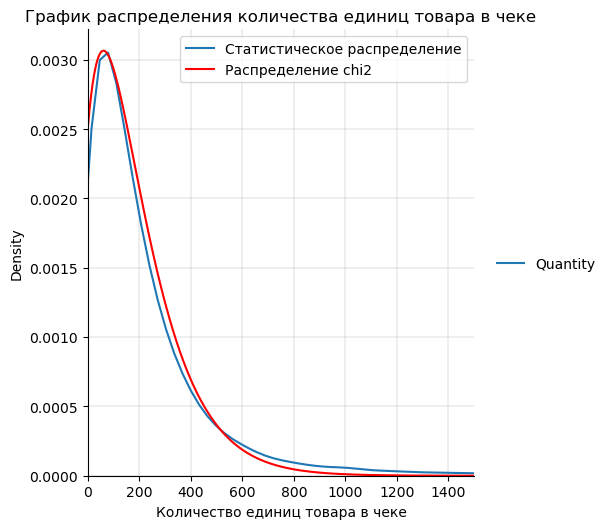

In [94]:
counts = sns.displot(df[:38900], kind='kde', label='Статистическое распределение')  #распределение на основе статистических данных
x = np.linspace(0, df['Quantity'].max(), 8716700)  #формируем непрерывный набор значений для графика распределения chi2
y = scipy.stats.chi2.pdf(x, df=4, loc=-60,scale=60)
plt.plot(x, y, color = 'red', label='Распределение chi2')  #теоретическое chi2 распределение
plt.title("График распределения количества единиц товара в чеке")
plt.xlabel("Количество единиц товара в чеке")
plt.grid(linewidth=0.3)  # Добавляем сетку
plt.xlim(0, 1500)
plt.legend()
plt.show()

In [174]:
quantities = df.groupby('Quantity').size()  # Подсчитываем, сколько раз какое количество позиций в чеке встречалось
quantities

Quantity
1        1300
2         598
3         324
4         364
5         238
         ... 
63302       1
63974       1
74215       1
83774       1
87167       2
Length: 1830, dtype: int64

In [96]:
full_quantities = np.zeros(df.max())  # Создаём массив с количеством элементов = самому большому количеству товаров в 1 чеке
for i in list(quantities.index):      # В нём находятся вероятности встретить в чеке то или иное количество товара
    full_quantities[i-1] = quantities.loc[i]
full_quantities

array([1300.,  598.,  324., ...,    0.,    0.,    2.])

In [195]:
counts, points = np.histogram(full_quantities, bins=1500)  # Разбиваем гистограмму на промежутки

In [196]:
obs_freq = counts.astype(float)/sum(counts)  # Массив с эксперименитальными вероятностями

In [197]:
exp_freq=np.zeros_like(obs_freq)

In [198]:
for i in range(len(exp_freq)):  # Массив с теоретическими вероятностями (из распределения chi2 в каждой точке от нуля до
    exp_freq[i] = y[i]          # максимально возможного количества товара

In [199]:
scipy.stats.chisquare(obs_freq, exp_freq/sum(exp_freq)*sum(obs_freq))

Power_divergenceResult(statistic=1515.9286795255125, pvalue=0.3744138801068197)

## pvalue больше 0.05. Гипотезу принимаем.

## Ищем доверительный интервал

In [200]:
quantities = quantities.to_numpy()
n = len(quantities)
n

1830

In [201]:
beta = 0.8

In [202]:
m = quantities.mean()
m

21.29672131147541

In [204]:
d = np.var(quantities, ddof = 1)
d

2753.114204662586

In [205]:
sco = np.sqrt(d/n)
sco

1.2265537051506956

In [207]:
tb = scipy.stats.norm.ppf((1.0+beta)/2.0)
tb

1.2815515655446004

In [208]:
eps = tb*sco
m1 = m - eps
m2 = m + eps
eps

1.571891821060404

In [209]:
f"Доверительный интервал Ib = ({m1:.4f}; {m2:.4f})"

'Доверительный интервал Ib = (19.7248; 22.8686)'

In [210]:
sco_d = np.sqrt(2/(n-1)) * d
sco_d

91.04002582822956

In [211]:
eps = tb*sco_d
d1 = d - eps
d2 = d + eps
eps

116.67248762738845

In [212]:
f"Доверительный интервал дисперсии Ib = ({d1:.4f}; {d2:.4f})"

'Доверительный интервал дисперсии Ib = (2636.4417; 2869.7867)'

In [213]:
f"Доверительный интервал СКО Ib = ({np.sqrt(d1):.4f}; {np.sqrt(d2):.4f})"

'Доверительный интервал СКО Ib = (51.3463; 53.5704)'